In [1]:
# import os
# from dotenv import load_dotenv

# load_dotenv()

# # 환경 변수로 자동 추적 (LangChain이 자동 감지)
# os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
# os.environ["LANGSMITH_TRACING"] = "true"  # 또는 "false"
# os.environ["LANGSMITH_PROJECT"] = "allforone"  # 프로젝트명

In [2]:
import os, sys
from pathlib import Path

src_path = Path(os.getcwd()).resolve().parents[1]
sys.path.append(str(src_path))

print(sys.path[-1])
import os

print(os.getcwd())

/Users/seobi/PythonProjects/RAG_Commander/src
/Users/seobi/PythonProjects/RAG_Commander/src/agents/main


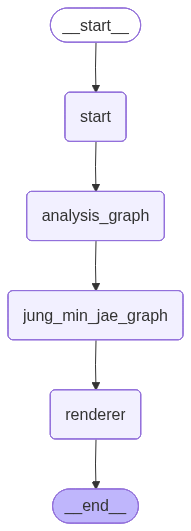

In [3]:
from agents.main.main_agent import graph_builder

graph = graph_builder.compile()
graph

In [4]:
from utils.format_message import format_message
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import InMemorySaver
from agents.state.main_state import MainState

messages_key = MainState.KEY.messages
checkpointer = InMemorySaver()
graph = graph_builder.compile(checkpointer=checkpointer)

thread = {"configurable": {"thread_id": "1"}}
result = await graph.ainvoke(
    {
        messages_key: [
            HumanMessage(
                content="서울 송파구 석촌동, 84타입, 120세대\n이메일은 dlwlstqj410@gmail.com"
            )
        ]
    },
    config=thread,
)

format_message(result[messages_key])

start_input target_area='서울 송파구 석촌동' main_type='84타입' total_units='120세대' email='dlwlstqj410@gmail.com' brand=None orientation=None parking_ratio=None terrain_condition=None gross_area=None floor_area_ratio_range=None building_coverage_ratio_range=None


/Users/seobi/PythonProjects/RAG_Commander/src/tools/rag/vector_store.py:33: LangChainPendingDeprecationWarning: This class is pending deprecation and may be removed in a future version. You can swap to using the `PGVector` implementation in `langchain_postgres`. Please read the guidelines in the doc-string of this class to follow prior to migrating as there are some differences between the implementations. See <https://github.com/langchain-ai/langchain-postgres> for details about the new implementation.
  _pgvector_cache[collection_name] = PGVector(


10년이상 노후도 호출 질문 송파구
10년이상 노후도 호출 결과 {'result': [{'house_cnt': '5769', 'adm_cd': '11240', 'adm_nm': '송파구'}], 'errCd': 0, 'errMsg': 'Success', 'id': 'API_0306', 'trId': 'XCda_API_0306_1762361125253'}
서울 송파구
연령층 분포 
행정구역: 송파구
2025년04월_계_총인구수: 647,426
2025년04월_계_연령구간인구수: 647,426
2025년04월_계_0~9세: 40,454
2025년04월_계_10~19세: 56,484
2025년04월_계_20~29세: 79,488
2025년04월_계_30~39세: 105,996
2025년04월_계_40~49세: 104,000
2025년04월_계_50~59세: 99,424
2025년04월_계_60~69세: 88,592
2025년04월_계_70~79세: 51,248
2025년04월_계_80~89세: 18,632
2025년04월_계_90~99세: 3,011
2025년04월_계_100세 이상: 97
2025년04월_남_총인구수: 310,186
2025년04월_남_연령구간인구수: 310,186
2025년04월_남_0~9세: 20,786
2025년04월_남_10~19세: 28,568
2025년04월_남_20~29세: 37,231
2025년04월_남_30~39세: 50,821
2025년04월_남_40~49세: 50,048
2025년04월_남_50~59세: 48,117
2025년04월_남_60~69세: 41,408
2025년04월_남_70~79세: 24,269
2025년04월_남_80~89세: 8,140
2025년04월_남_90~99세: 774
2025년04월_남_100세 이상: 24
2025년04월_여_총인구수: 337,240
2025년04월_여_연령구간인구수: 337,240
2025년04월_여_0~9세: 19,668
2025년04월_여_10~19세: 27,916
2025년04월_

╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ 서울 송파구 석촌동, 84타입, 120세대                                                                             │
│ 이메일은 dlwlstqj410@gmail.com                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [8]:
result.keys()

dict_keys(['messages', 'start_input', 'final_report', 'status', 'analysis_outputs'])

In [9]:
result['start_input']

{'target_area': '서울 송파구 석촌동',
 'main_type': '84타입',
 'total_units': '120세대',
 'email': 'dlwlstqj410@gmail.com',
 'brand': None,
 'orientation': None,
 'parking_ratio': None,
 'terrain_condition': None,
 'gross_area': None,
 'floor_area_ratio_range': None,
 'building_coverage_ratio_range': None}

In [6]:
print(result['analysis_outputs']['location_insight'].keys())
print(result['analysis_outputs']['location_insight']['result'])

dict_keys(['result', 'gemini_search', 'kakao_api_distance_context'])
{
  "입지정보": {
    "주소": "서울 송파구 석촌동",
    "좌표": {
      "longitude": 127.103667384036,
      "latitude": 37.5035646306702
    },
    "교육환경": {
      "학교": [
        {
          "이름": "서울석촌초등학교",
          "주소": "서울 송파구 가락로11길 26",
          "거리(미터)": 103
        },
        {
          "이름": "서울가락초등학교",
          "주소": "서울 송파구 송파대로37길 45",
          "거리(미터)": 514
        },
        {
          "이름": "서울해누리초등학교",
          "주소": "서울 송파구 송파대로37길 95",
          "거리(미터)": 554
        }
      ],
      "학원": [
        {
          "이름": "YBM잉글루 송파석촌 제1캠퍼스",
          "주소": "서울 송파구 가락로11길 33",
          "거리(미터)": 48
        },
        {
          "이름": "한울림음악학원",
          "주소": "서울 송파구 가락로11길 23",
          "거리(미터)": 131
        },
        {
          "이름": "이투스247학원 송파점",
          "주소": "서울 송파구 백제고분로 354",
          "거리(미터)": 187
        }
      ]
    },
    "교통여건": [
      {
        "이름": "석촌역 9호선",
        "주소": "서울 송파구 백

In [7]:
print(result['final_report'])

# Executive Summary (BLUF)

- 결론: 서울 송파구 석촌동 84㎡, 120세대 소규모 신축은 석촌역 더블역세권(8·9호선), 초근접 학군·학원가, 생활편의·공세권(근린공원 다수)로 실거주 선호도가 높은 입지다. 입지 체감 우위에도 불구하고 단지 규모(120세대)와 브랜드 변수로 인해 프리미엄 상단이 제한된다.  
- 권장 분양가 레인지: 3.3㎡당 7,800~8,700만원(전용 84㎡ 총액 약 19.8~22.1억원). 이 밴드는 최근 인근 실거래·분양가 밴드(7,300~9,200만원/3.3㎡, 2023~2024년) 내에서 소규모·비대단지 보정(보수적)과 더블역세권 가점을 동시에 반영했다.  
- 포지셔닝: 하단·중단(7,800~8,400만원/3.3㎡)은 빠른 흡수와 실수요 저항 최소화, 상단(8,400~8,700만원/3.3㎡)은 역세권·교육·생활편의 체감 우위가 명확한 주동·층·조망 한정 적용이 타당.  
- 핵심 리스크: ① 주변 대단지·브랜드 시세 상단(9,000만원+/3.3㎡) 대비 가격 초과 시 미계약 위험, ② 소규모(120세대)로 커뮤니티·관리 프리미엄 한계, ③ 개발호재(잠실 MICE, 위례신사선) 장기 일정 불확실성, ④ 분양가상한제 기본형 건축비(국토교통부 고시) 변동에 따른 원가 변동성(2024-09, 2025-09 연속 상향 고시).  
- 기회 요인: 도보 5분 내 더블역세권+초근접 초등학교(103m)+학원가(50~200m) 밀집, 10분 내 대형마트·의료시설·공원 접근이 동시 충족되는 “슬세권+공세권” 조합.  
- 수요 근거(핵심 지표): 30~39세 106,141명, 40~49세 103,853명(2025-09)으로 학령기 코어 수요가 두텁고, 0~9세 39,724명으로 초등 통학 수요가 유의미하다. 미분양 0(2020-07~2025-08)은 송파권 내 청약 흡수력의 구조적 강세를 입증한다. [출처: 국토교통부 통계누리, 인구/수요 시계열, 수집일 2025-11-06]  
- 판단 근거: 대상지 반경 300~500